In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
# Import boston dataset
from sklearn.datasets import load_boston
boston = load_boston()
# The boston variable itself is a dictionary, so you can check for its keys using the .keys() method.

print(boston.keys())
# You can easily check for its shape by using the boston.data.shape attribute, which will return the size of the dataset.

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [4]:
# Let's convert it to pandas dataframe
data = pd.DataFrame(data = boston.data, columns = boston.feature_names)
data['PRICE'] = boston.target
data.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


###### Dataframe info

In [5]:
print(f"Data shape: \n {data.shape} \n")
print(f"Data columns: \n {data.columns} \n")
print(f"Data index: \n {data.index} \n")
print(f"Data values: \n {data.values} \n")
print(f"Data info: \n {data.info} \n")
print(f"Data summary: \n")
data.describe()

Data shape: 
 (506, 14) 

Data columns: 
 Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object') 

Data index: 
 RangeIndex(start=0, stop=506, step=1) 

Data values: 
 [[6.3200e-03 1.8000e+01 2.3100e+00 ... 3.9690e+02 4.9800e+00 2.4000e+01]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 3.9690e+02 9.1400e+00 2.1600e+01]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 3.9283e+02 4.0300e+00 3.4700e+01]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 3.9690e+02 5.6400e+00 2.3900e+01]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 3.9345e+02 6.4800e+00 2.2000e+01]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 3.9690e+02 7.8800e+00 1.1900e+01]] 

Data info: 
 <bound method DataFrame.info of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


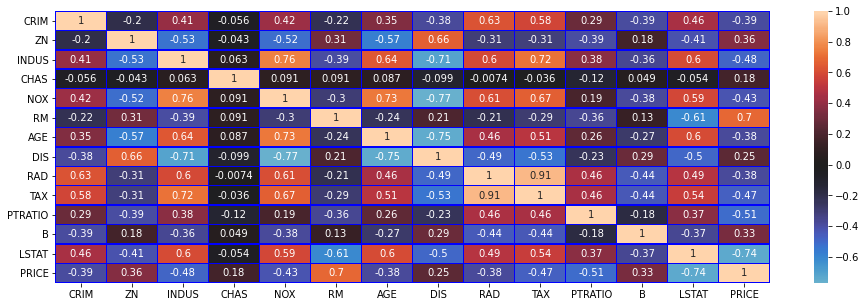

In [6]:
# Correlation matrix
corr_matrix_origin = (data.loc[:, data.columns]).corr(method ='pearson')
list_col_origin = list(data.columns)
plt.figure(figsize = (16,5))
ax = sns.heatmap(corr_matrix_origin, annot=True,
                 yticklabels=list_col_origin,
                 xticklabels=list_col_origin,
                 annot_kws={'size': 10},
                linecolor='blue', center=False,  linewidths=.5)

As we can see we have some highly correlated features and also target variable is correlated with this features, so we ca say that there is relationship between target and features.

#### Data visualisation

In [7]:
# Let see the distribution of each independent variable
# First we will define function for subplots of histograms
def sub_hist(data, m=15, n=25, num_col = None, *args):
    if data.shape[1] %2 == 0:
        i = data.shape[1]//num_col
    else:
        i = data.shape[1]//num_col + 1
    fig, axes = plt.subplots(i, num_col, figsize=(m, n))
    for i in range(i):
        for j in range(num_col):
            if (2*i+j) < data.shape[1]:
                sns.distplot(data[data.columns[2*i+j]], ax=axes[i,j] )
            else:
                axes[i,j].set_axis_off()


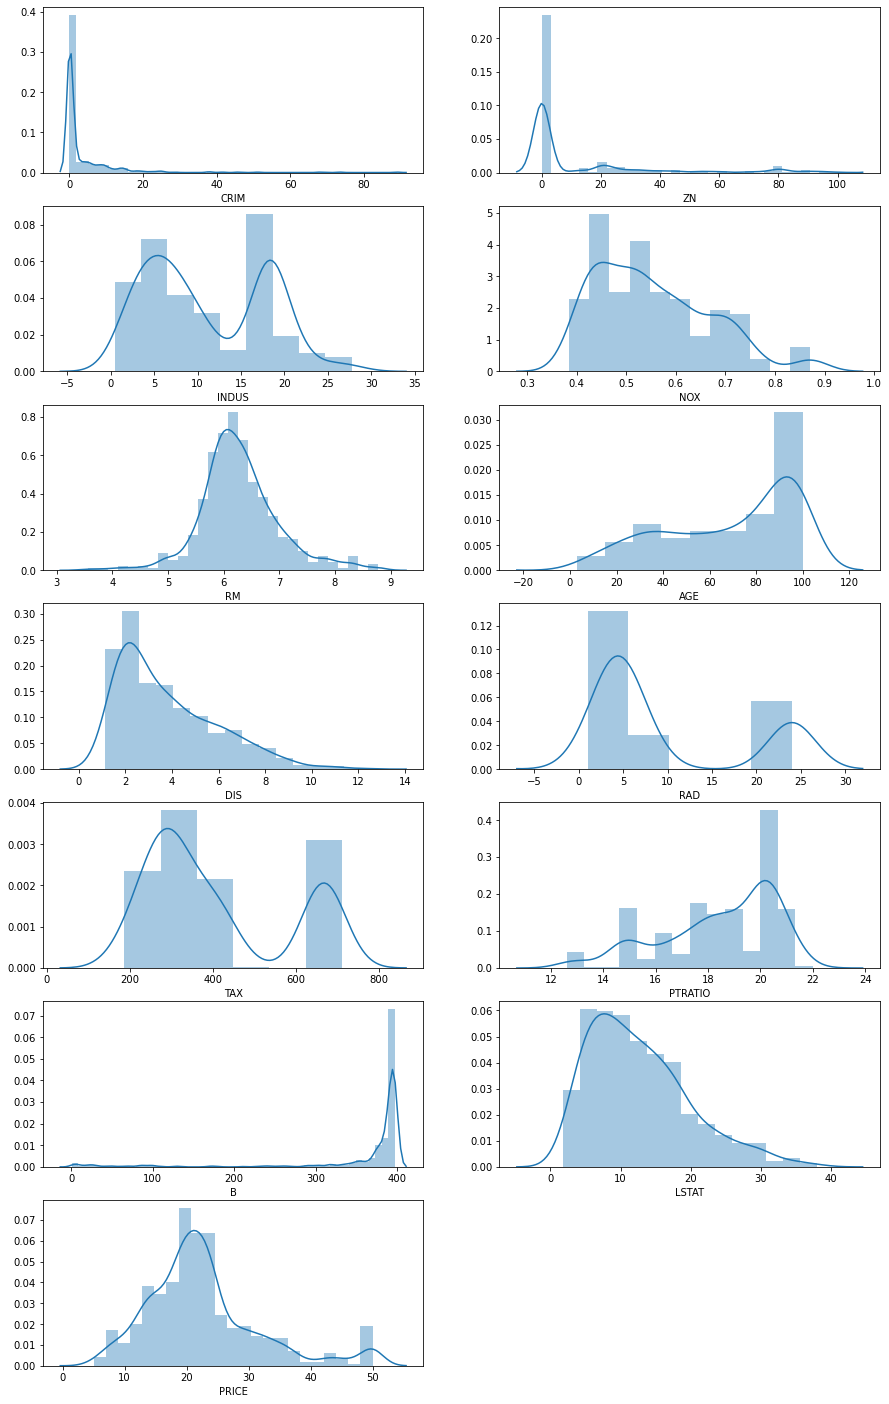

In [8]:
sub_hist(data = data.drop('CHAS', axis = 1), num_col =2)

In [9]:
# Let create function for subplots of boxplots
def sub_boxplot(data, m=15, n=25, num_col = None, y=None, hue=None, orient='h', *args):
    if data.shape[1] %2 == 0:
        i = data.shape[1]//num_col
    else:
        i = data.shape[1]//num_col + 1
    fig, axes = plt.subplots(i, num_col, figsize=(m, n))
    for i in range(i):
        for j in range(num_col):
            if (2*i+j) < data.shape[1]:
                sns.boxplot(x = data.columns[2*i+j], y=y, data=data, hue=hue, orient=orient , ax=axes[i,j] )
            else:
                axes[i,j].set_axis_off()

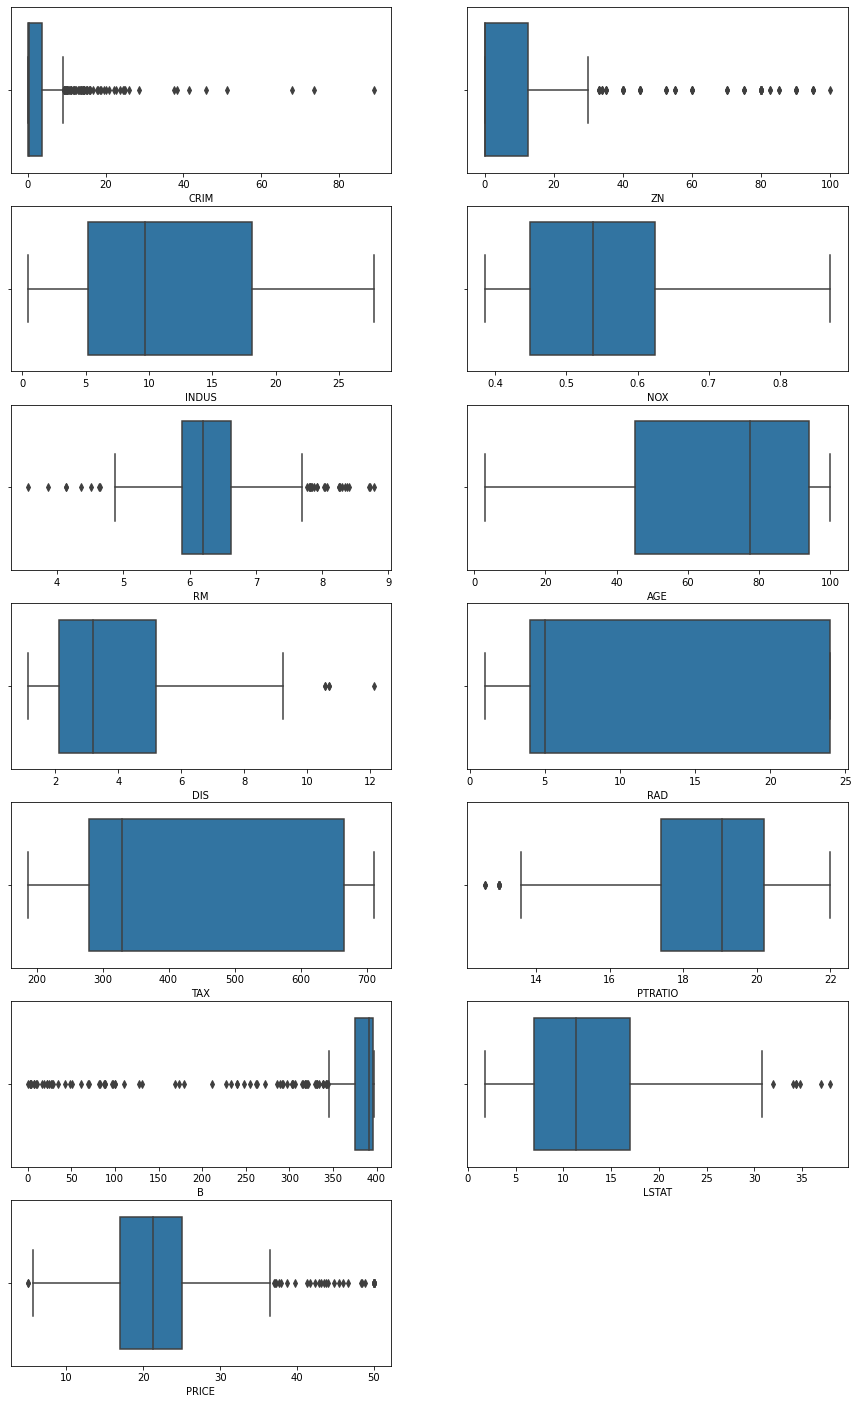

In [13]:
# Let see the distribution of each continual feature in dataset using boxplots
sub_boxplot(data = data.drop('CHAS', axis=1),m=15,n=25, num_col = 2)

In [26]:
# Let create function for ploting scatter plot between variables
def sub_scatterplot(data, m=15, n=25, y = None, hue = None, num_col = None, *args):
    if data.shape[1] %2 == 0:
        i = data.shape[1]//num_col
    else:
        i = data.shape[1]//num_col + 1
    fig, axes = plt.subplots(i, num_col, figsize=(m, n))
    if i == 1:
        for j in range(num_col):
            sns.scatterplot(x = data.columns[j], y=y, data=data, hue=hue, ax=axes[j])
    else:
        for i in range(i):
            for j in range(num_col):
                if (2*i+j) < data.shape[1]:
                    sns.scatterplot(x = data.columns[2*i+j], y=y, data=data, hue=hue, ax=axes[i,j])
                else:
                    axes[i,j].set_axis_off()

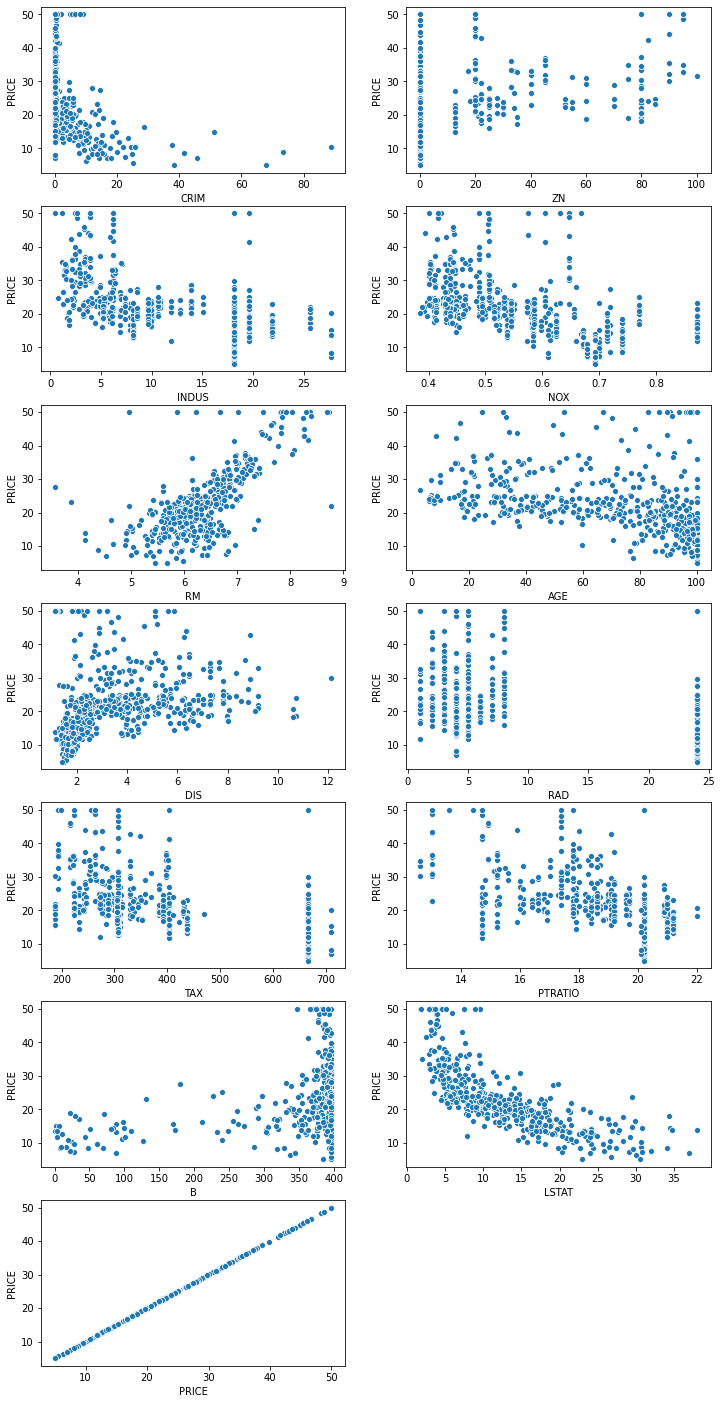

In [27]:
# Let see the distribution of each descrete feature and target variable
sub_scatterplot(data = data.drop('CHAS', axis=1), y ='PRICE', m=12, n=25, num_col = 2)

#### Dealing with missing data

In [28]:
# Missing values in whole dataset
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

#### Split dataset on train and test

In [29]:
X = data.drop('PRICE', axis = 1)
y = data.PRICE
display(X.head(2))
display(y)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

In [30]:
# Split independent and target variable on train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.25, random_state=0)

In [31]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (379, 13)
y_train shape: (379,)
X_test shape: (127, 13)
y_test shape: (127,)


#### Bringing features onto the same scale¶

In [32]:
# First we will try to normalize data and than we will observe the distribution of data
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler()

# transform training data
X_train_norm = norm.fit_transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

In [33]:
# Second we will try to standardize data and than we will observe the distribution of data
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

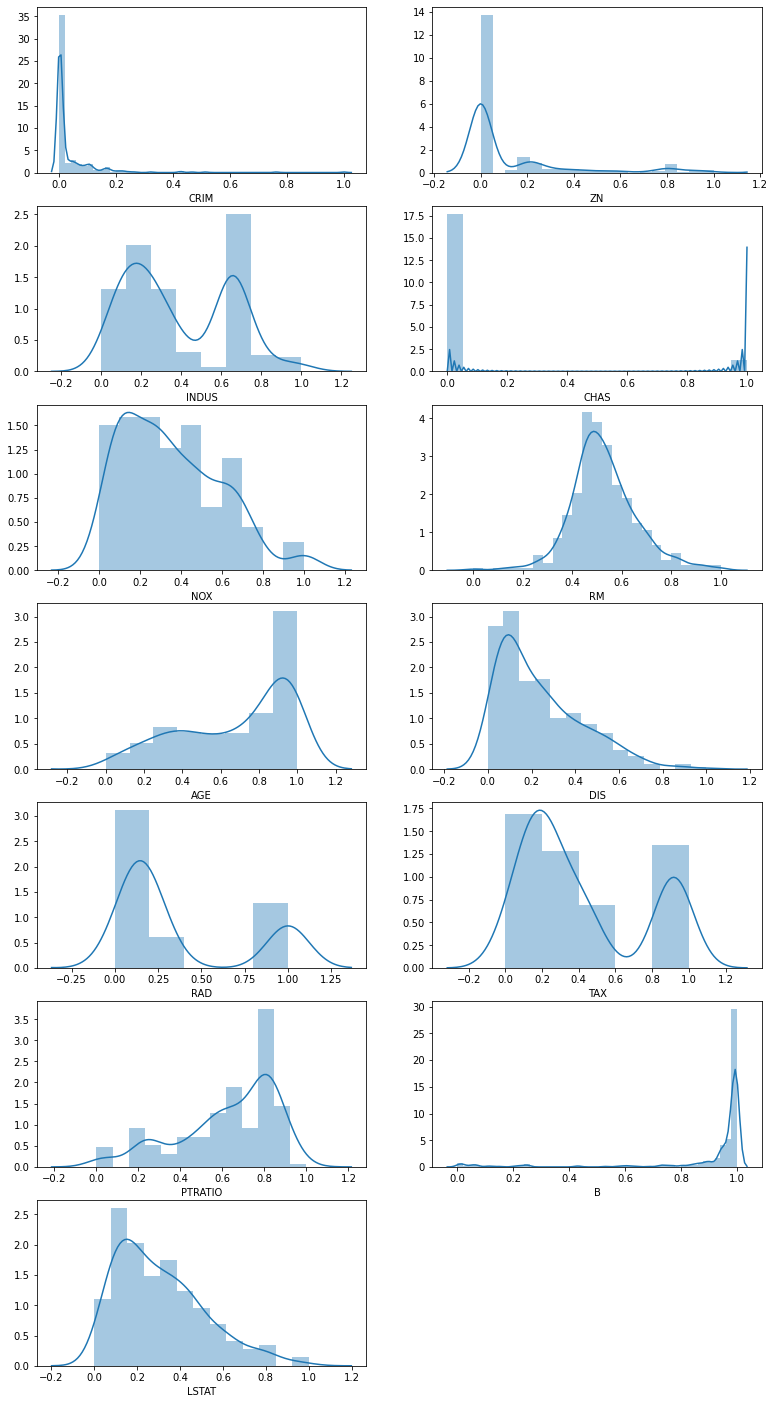

In [35]:
# Distribution of normalized train data
col_names = list(data.columns)
col_names.remove('PRICE')
df_norm = pd.DataFrame(data = X_train_norm, columns = col_names)
sub_hist(df_norm,m=13,n=25, num_col = 2)

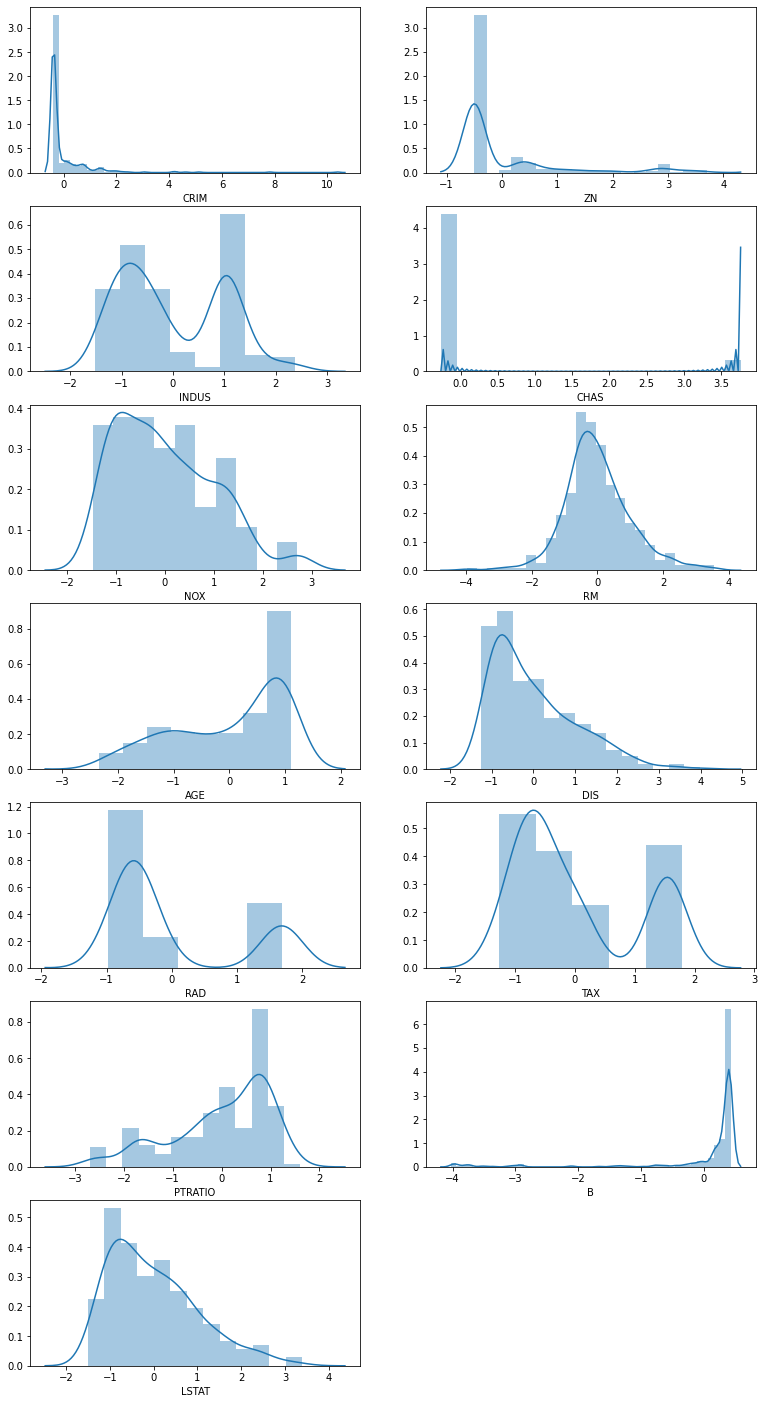

In [36]:
# Dist of standardized data
df_std = pd.DataFrame(data = X_train_std, columns = col_names)
sub_hist(df_std,m=13,n=25, num_col = 2)

#### Data modeling

Let put 10 or more different models on standardized and balanced train dataset and than compare which one is modelling the best.

In [40]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

# Create dict acc_scores to see which model is the best
mean_sq_err_std = {}
mean_abs_err_std = {}

In [45]:
# Define function for train,fit and predict new outcomes 
def train_model(model, X_train, y_train, X_test, y_test, model_name, acc_scores = mean_sq_err_std):
    clf = model
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='r2')
    print(f"Cross_val_scores: {scores} \n ")
    print(f"Cross_val_scores_mean: {scores.mean()} \n ")
    print(f"Cross_val_scores_std: {scores.std()} \n")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc_scores[model_name] = mean_squared_error(y_test, y_pred)
    print(f"Mean error of {model_name}: {acc_scores[model_name]}")
    return model, acc_scores

In [46]:
# First model SVC kernel linear
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR, LinearSVR
svr_linear = SVR(kernel='linear', C=1)
model_1 = train_model(svr_linear, X_train_std, y_train, X_test_std, y_test, 'svr_linear')

Cross_val_scores: [0.81365552 0.52668318 0.76874912 0.6723498  0.80023503] 
 
Cross_val_scores_mean: 0.7163345313892782 
 
Cross_val_scores_std: 0.10692076394841621 

Mean error of svr_linear: 35.24178412488099


In [47]:
# Second model SVR_rbf
SVR_rbf = SVR()
model_2 = train_model(SVR_rbf, X_train_std, y_train, X_test_std, y_test, 'SVR_rbf')

Cross_val_scores: [0.75173213 0.80430563 0.61787726 0.60021103 0.60245353] 
 
Cross_val_scores_mean: 0.6753159170339249 
 
Cross_val_scores_std: 0.08570490706727946 

Mean error of SVR_rbf: 40.16084662547559


In [48]:
# Third model RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
ran_for_reg = RandomForestRegressor()
model_3 = train_model(ran_for_reg, X_train_std, y_train, X_test_std, y_test, 'ran_for_reg')

Cross_val_scores: [0.92477066 0.70312102 0.90889648 0.78977124 0.88684156] 
 
Cross_val_scores_mean: 0.8426801919041903 
 
Cross_val_scores_std: 0.08408303857266276 

Mean error of ran_for_reg: 15.882286866141747


In [50]:
# Fourth model LinearRegression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
model_4 = train_model(lin_reg, X_train_std, y_train, X_test_std, y_test, 'lin_reg')

Cross_val_scores: [0.76260062 0.56956022 0.77935231 0.70774465 0.79031905] 
 
Cross_val_scores_mean: 0.7219153693705491 
 
Cross_val_scores_std: 0.08129729908048447 

Mean error of lin_reg: 29.782245092302325


Text(0, 0.5, 'Testing Accuracy')

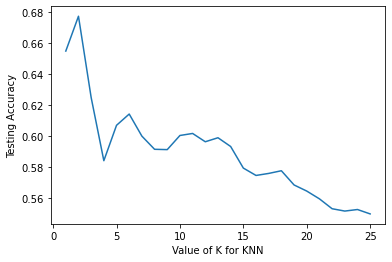

In [52]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
%matplotlib inline
import matplotlib.pyplot as plt

#import metrics model to check the accuracy 
from sklearn import metrics
#Try running from k=1 through 25 and record testing accuracy
k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train_std,y_train)
        y_pred=knn.predict(X_test_std)
        scores[k] = metrics.mean_squared_error(y_test,y_pred)
        scores_list.append(metrics.r2_score(y_test,y_pred))


#plot the relationship between K and the testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [53]:
models_KNN = {}
for k in [2,3,6]:
    KNN = KNeighborsRegressor(n_neighbors=k)
    print(f"Results of KNN with {k} neighbors: \n ")
    
    models_KNN['KNN_' + str(k)+'_neigh'] = train_model(KNN, X_train_std, y_train, X_test_std, y_test, model_name ='KNN_'+str(k))

Results of KNN with 2 neighbors: 
 
Cross_val_scores: [0.86471892 0.56048655 0.70339888 0.71824141 0.75644391] 
 
Cross_val_scores_mean: 0.7206579330191806 
 
Cross_val_scores_std: 0.09797223005239362 

Mean error of KNN_2: 26.36383858267716
Results of KNN with 3 neighbors: 
 
Cross_val_scores: [0.85618026 0.53433234 0.72534508 0.73525848 0.75874971] 
 
Cross_val_scores_mean: 0.7219731745738599 
 
Cross_val_scores_std: 0.10465276648839766 

Mean error of KNN_3: 30.646929133858265
Results of KNN with 6 neighbors: 
 
Cross_val_scores: [0.8221507  0.73697887 0.75392241 0.70933304 0.74222838] 
 
Cross_val_scores_mean: 0.7529226780025752 
 
Cross_val_scores_std: 0.037582304834662204 

Mean error of KNN_6: 31.517583114610662


In [54]:
# 8th XGBoostRegressor
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
# Fit the model
xg_reg.fit(X_train_std,y_train)
# Test model
y_pred = xg_reg.predict(X_test_std)
mean_sq_err_std['xgb_reg_squarederror'] = mean_squared_error(y_test, y_pred)

print(mean_sq_err_std['xgb_reg_squarederror'])

114.04045745335408


In [55]:
# 9th model DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor()
model_9 = train_model(dec_tree_reg, X_train_std, y_train, X_test_std, y_test, model_name = 'dec_tree_reg')

Cross_val_scores: [0.88109496 0.69714398 0.82627389 0.76181493 0.89079122] 
 
Cross_val_scores_mean: 0.8114237959551645 
 
Cross_val_scores_std: 0.07334125495645444 

Mean error of dec_tree_reg: 30.000393700787402


In [57]:
# 10th model ExtraTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import ExtraTreeRegressor
extra_tree = ExtraTreeRegressor(random_state=0)
bag_reg_extra_tree = BaggingRegressor(extra_tree, random_state=0)
model_10 = train_model(bag_reg_extra_tree, X_train_std, y_train, X_test_std, y_test, model_name = 'bag_reg_extra_tree')

Cross_val_scores: [0.91115984 0.74508282 0.90106722 0.8604712  0.88316447] 
 
Cross_val_scores_mean: 0.8601891111192252 
 
Cross_val_scores_std: 0.06007735142027879 

Mean error of bag_reg_extra_tree: 20.855281102362202


In [58]:
# Lets plot the results of models
df_results = pd.DataFrame({'models': list(mean_sq_err_std.keys()),
                          'models_err': list(mean_sq_err_std.values())})
df_results

,models,models_err
0,svr_linear,35.241784
1,SVR_rbf,40.160847
2,ran_for_reg,15.882287
3,lin_reg,29.782245
4,KNN_2,26.363839
5,KNN_3,30.646929
6,KNN_6,31.517583
7,xgb_reg_squarederror,114.040457
8,dec_tree_reg,30.000394
9,bag_reg_extra_tree,20.855281


[Text(0, 0.5, 'models_err')]

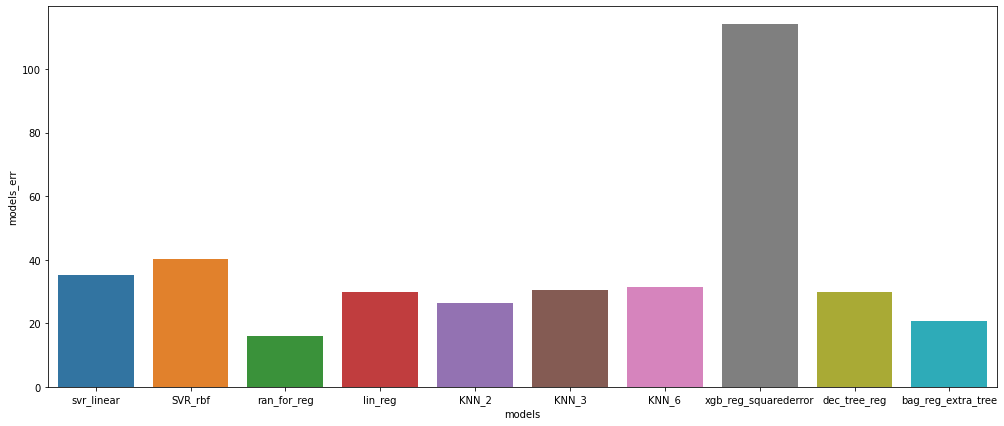

In [59]:
plt.figure(figsize=(17,7))
ax = sns.barplot(x = "models", y = "models_err", data = df_results)
ax.set(ylabel = "models_err")

In [60]:
# Let see which model gives the best result
print(f"The model with the smallest error is {min(mean_sq_err_std, key=mean_sq_err_std.get)} and it's error is {mean_sq_err_std[min(mean_sq_err_std, key=mean_sq_err_std.get)]:.3f}.")

The model with the smallest error is ran_for_reg and it's error is 15.882.
